In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

# Importing the dataset

In [4]:
data=pd.read_excel(r'C:\Users\GR20258288\Downloads\customer.xlsx')

In [5]:
data

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


# Creating the dataframe

In [6]:
df=pd.DataFrame(data)

In [8]:
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [9]:
df.shape

(269, 71)

The dataset has 269 rows and 71 columns.

In [10]:
df.keys()

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

all the columns are categorical in nature and needs to be encoded.

In [11]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

There are no null values in the dataset()

from the dataset column  'Which of the Indian online retailer would you recommend to a friend?' is the target variable.Looking at the values in the target variable it is a Regression problem

In [9]:
df['Which of the Indian online retailer would you recommend to a friend?'].unique()

array(['Flipkart.com', 'Amazon.in, Myntra.com',
       'Amazon.in, Paytm.com, Myntra.com', 'Amazon.in, Flipkart.com',
       'Amazon.in, Paytm.com',
       'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com', 'Amazon.in',
       'Amazon.in, Flipkart.com, Myntra.com'], dtype=object)

In [27]:
df['Which of the Indian online retailer would you recommend to a friend?'].value_counts()

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64

C:\Users\GR20258288\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Which of the Indian online retailer would you recommend to a friend?', ylabel='count'>

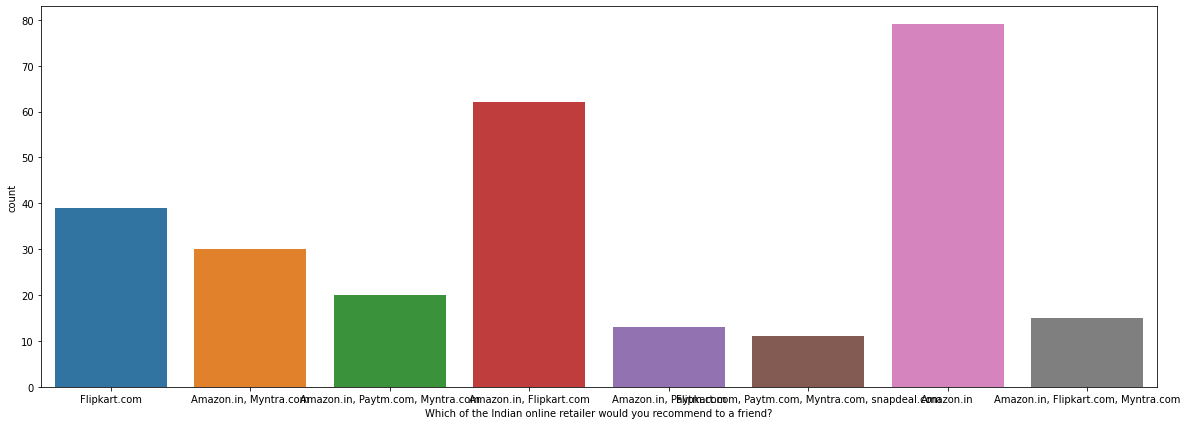

In [26]:

plt.figure(figsize=(20,7))
sns.countplot(df['Which of the Indian online retailer would you recommend to a friend?'])

# Encoding the columns

In [11]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                   

In [12]:
le = LabelEncoder()

for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype
---  ------                                                                                                                                                                                                          --------------  -----
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    int32
 1   2 How old are you?                                                                                                                                                                       

In [13]:
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,1,1,2,110009,3,2,0,0,3,2,...,0,0,3,5,0,3,2,0,0,6
1,0,0,2,110030,3,3,3,2,0,1,...,1,6,7,10,7,5,0,4,1,3
2,0,0,4,201308,2,3,1,2,2,0,...,7,6,4,7,0,3,5,6,0,5
3,1,0,6,132001,2,5,1,2,2,1,...,9,7,4,8,5,3,1,1,2,1
4,0,0,0,530068,1,0,3,2,0,1,...,5,8,5,8,7,3,0,7,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0,0,10,173212,0,5,1,2,2,0,...,0,0,0,0,0,0,0,0,0,0
265,0,1,3,201008,0,2,1,2,3,0,...,4,4,3,5,3,1,2,2,4,6
266,0,2,0,560010,1,5,2,1,3,2,...,0,9,0,10,7,5,6,7,0,0
267,0,4,10,173229,1,5,3,2,2,0,...,0,2,0,4,0,0,0,5,5,0


The dataset has been encoded using Label encoder and we can see that most of the columns have similar output

C:\Users\GR20258288\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Longer delivery period', ylabel='Which of the Indian online retailer would you recommend to a friend?'>

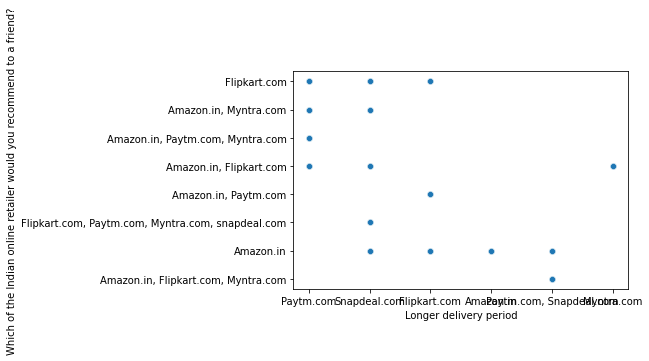

In [28]:
sns.scatterplot(df['Longer delivery period'],df['Which of the Indian online retailer would you recommend to a friend?'])

The above plot shows how the delivery period effects the target variable

C:\Users\GR20258288\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Security of customer financial information', ylabel='Which of the Indian online retailer would you recommend to a friend?'>

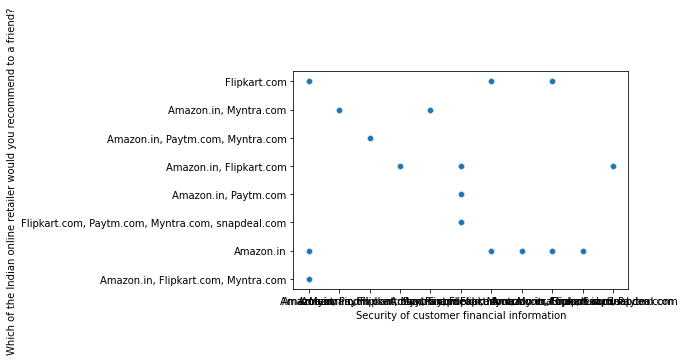

In [30]:
sns.scatterplot(df['Security of customer financial information'],df['Which of the Indian online retailer would you recommend to a friend?'])

The plot shows how secured the customer financial information is for each target variable contents

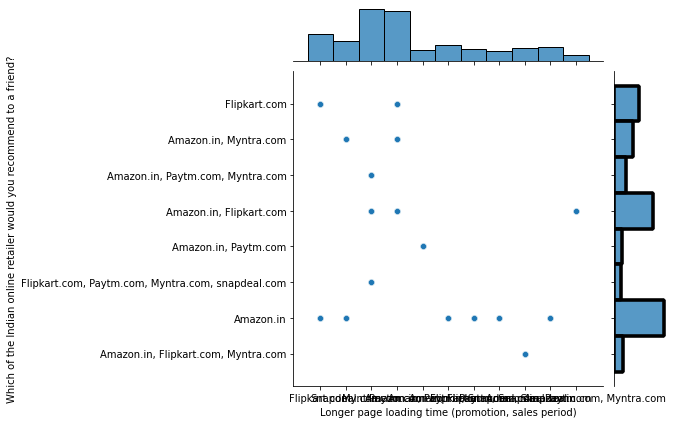

In [33]:
sns.jointplot(data=df,x=df['Longer page loading time (promotion, sales period)'],y=df['Which of the Indian online retailer would you recommend to a friend?'])

From the above plot we can see the dots in the middle how the target variable varies with input variable. Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X). The third plot is placed on the right margin of the bivariate graph with the orientation set to vertical and it shows the distribution of the dependent variable(Y).

<AxesSubplot:xlabel='Presence of online assistance through multi-channel', ylabel='Which of the Indian online retailer would you recommend to a friend?'>

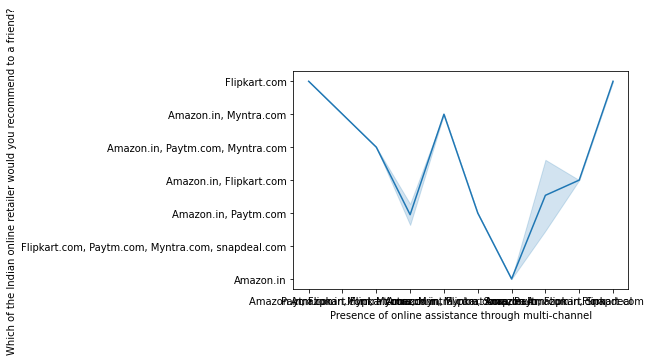

In [35]:
sns.lineplot(data=df,x=df['Presence of online assistance through multi-channel'],y=df['Which of the Indian online retailer would you recommend to a friend?'])

The above plot gives us information about the frequency of the data.

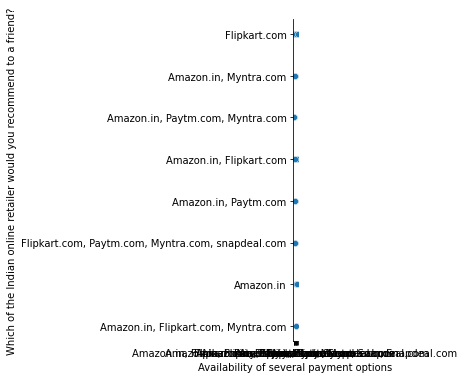

In [36]:
sns.relplot(data=df,x=df['Availability of several payment options'],y=df['Which of the Indian online retailer would you recommend to a friend?'])

The data is uniform for all the contents of Target variable

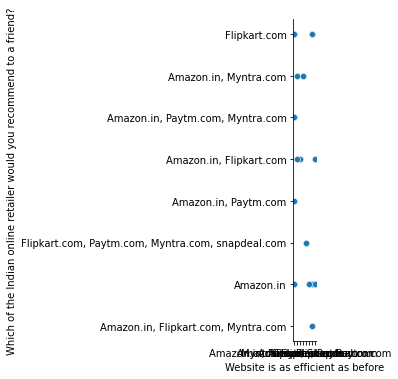

In [39]:
sns.relplot(data=df,x=df['Website is as efficient as before'],y=df['Which of the Indian online retailer would you recommend to a friend?'])

 THe plot shows the website effiency for each content of the target variable

<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\GR20258288\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\GR20258288\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


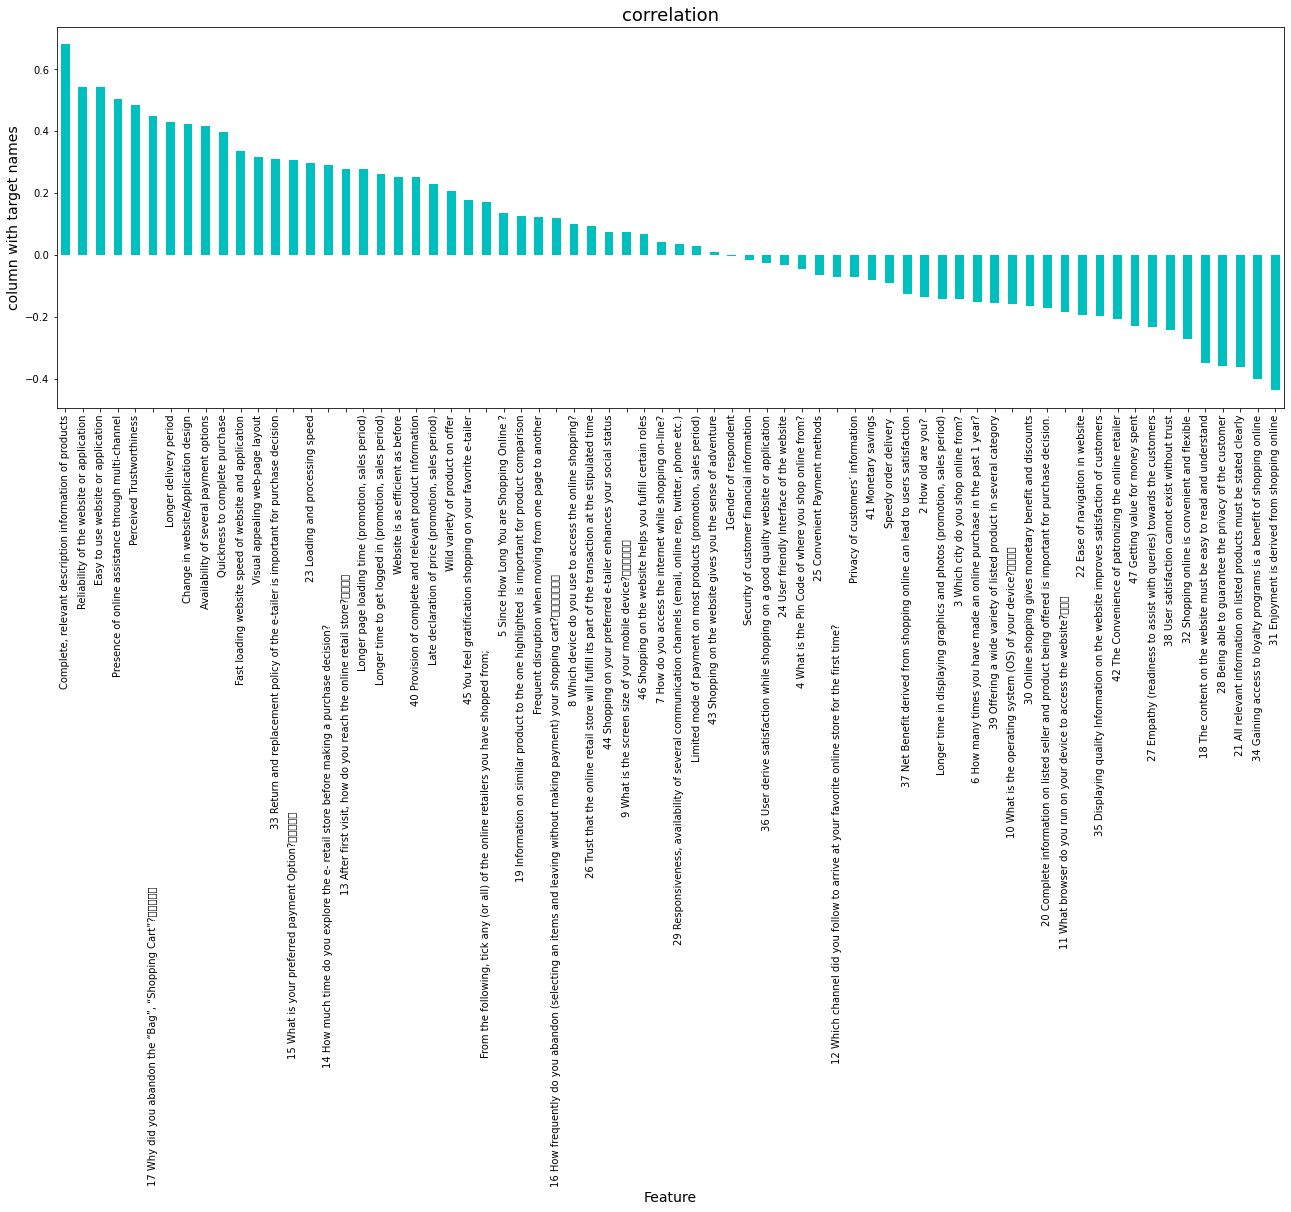

In [81]:

plt.figure(figsize=(22,7))
df.corr()['Which of the Indian online retailer would you recommend to a friend?'].sort_values(ascending=False).drop(['Which of the Indian online retailer would you recommend to a friend?']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show


The graph above shows the columns that are positively and nefatively correlated to the Target variable.

# Scaling

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [78]:
x = StandardScaler().fit_transform(x)

In [41]:
x

array([[ 1.43416114, -0.2800127 , -0.78397694, ..., -0.08825722,
        -1.40519246, -0.98469733],
       [-0.69727172, -1.12634321, -0.78397694, ..., -1.0192844 ,
         0.16163354, -0.52322768],
       [-0.69727172, -1.12634321, -0.15539334, ...,  1.30828355,
         0.94504654, -0.98469733],
       ...,
       [-0.69727172,  0.56631782, -1.41256055, ...,  1.77379714,
         1.33675303, -0.98469733],
       [-0.69727172,  2.25897885,  1.73035746, ..., -1.0192844 ,
         0.55334004,  1.32265095],
       [-0.69727172,  0.56631782, -0.46968514, ..., -1.0192844 ,
        -1.40519246, -0.98469733]])

# Performing PCA since the dataset has lot of columns.Reducing the columns to 30 by using PCA

In [42]:
pca=PCA(n_components=30)
x=pca.fit_transform(x)

In [43]:
x.shape

(269, 30)

In [48]:
df1=pd.DataFrame(data=x)
df1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,6.505199,-0.577588,-4.097674,-2.718458,1.782983,-2.916474,2.256498,-1.649281,-1.436519,-1.163657,...,0.987252,0.710641,-0.380320,-0.885839,0.090264,0.512245,0.291551,0.240695,-0.009731,0.019943
1,-0.082673,-4.738456,1.640377,2.434682,0.476865,-1.340697,1.692335,1.255866,-0.906084,-0.648703,...,-1.186538,-0.916788,-0.629182,-0.029663,-0.994810,0.091165,-0.181179,-0.273318,0.114246,0.001285
2,5.156675,-1.685771,0.195400,-3.473859,-0.973577,1.622219,-2.420208,0.967880,0.813937,-1.728403,...,0.376281,-0.636814,-0.226464,-0.118954,-0.305037,0.125737,0.610647,0.065601,0.081875,0.013119
3,0.892512,3.926645,3.544242,-1.079806,-4.772588,0.415107,2.303796,0.172061,-0.674534,-0.178794,...,0.340298,-0.193544,-0.282800,0.032735,0.166373,-0.507188,0.374399,0.067133,-0.064258,-0.000694
4,2.037475,-3.302643,6.254531,3.679314,0.252745,-2.651423,-2.220046,-1.041778,0.446790,1.589799,...,-0.284050,0.647729,0.007213,0.185023,-0.709953,-0.501045,-0.270473,0.071662,-0.064195,0.035044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,0.182346,6.650745,-2.315930,3.194980,-1.992880,-2.733426,-3.055420,-3.628370,0.686138,-0.618892,...,-0.850095,-1.585998,-0.760531,-0.881873,0.403880,-0.401172,0.352969,0.134521,0.016159,-0.062558
265,2.441891,-1.818579,-1.057157,1.694870,-0.369666,1.160979,0.673213,0.218320,-1.040770,-0.155661,...,-0.330374,-0.898424,0.378319,-0.214343,-0.233971,1.007611,-0.651976,0.109627,-0.082459,-0.014593
266,-4.645771,1.284577,-0.171898,-2.610972,0.481306,-1.852217,0.372367,2.214307,6.647677,-1.365233,...,0.369151,0.425426,0.040312,-0.318133,-0.567769,-0.423280,-0.424097,0.031958,0.077552,-0.005743
267,1.972733,2.611819,-1.911759,3.225597,2.002635,6.021435,-0.366181,0.498467,0.741635,2.982448,...,-0.687993,0.071029,-0.132177,-0.166102,0.047355,0.149660,0.084567,-0.021162,0.030135,0.024231


After PCA the columns are reduced to 30

since all the columns are categorical in nature we will not check for outliers and skewness